## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Sort on Mouse ID
sortmmetadata = mouse_metadata.sort_values(by = ['Mouse ID'])
sortstudyr = study_results.sort_values(by = ['Mouse ID'])

# Combine the data into a single dataset
mousedataresults = sortmmetadata.merge(sortstudyr, on = 'Mouse ID')
mousedataresults.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     a203    Infubinol  Female          20          23          0   
1     a203    Infubinol  Female          20          23          5   
2     a203    Infubinol  Female          20          23         25   
3     a203    Infubinol  Female          20          23         40   
4     a203    Infubinol  Female          20          23         35   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           48.508468                 0  
2           56.793208                 1  
3           63.593490                 2  
4           61.931650                 2

In [3]:
# Checking the number of mice in the DataFrame.
uniquemice = len(mousedataresults['Mouse ID'].unique())

In [4]:
# Identify the duplicate mouse by using Mouse ID and Timepoint so you can clean up data 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousedups = mousedataresults.groupby('Mouse ID')['Timepoint'].nunique()
mousedups

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [5]:
mousedupsid = mousedataresults.loc[mousedataresults.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
mousedupsid

array(['g989'], dtype=object)

In [6]:
mousedupsdata = mousedataresults.loc[mousedataresults['Mouse ID'] == 'g989']
mousedupsdata

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   
587     g989     Propriva  Female          21          26         15   
588     g989     Propriva  Female          21          26         20   
589     g989     Propriva  Female          21          26          0   
590     g989     Propriva  Female          21          26         10   
591     g989     Propriva  Female          21          26         10   
592     g989     Propriva  Female          21          26         15   
593     g989     Propriva  Female          21          26          5   
594     g989     Propriva  Female          21          26         30   
595     g989     Propriva  Female          21          26         20   
596     g989     Propriva  Female          21          26         25   
597     g989     Propriva  Female          21          26          5   
598     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
586           45.000000                 0  
587           51.325852                 1  
588           55.326122                 1  
589           45.000000                 0  
590           51.745156                 0  
591           49.880528                 0  
592           53.442020                 0  
593           48.786801                 0  
594           59.082294                 1  
595           54.657650                 1  
596           56.045564                 1  
597           47.570392                 0  
598           62.570880                 2

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
ids = mousedataresults["Mouse ID"]
mousedataresults[ids.isin(ids[ids.duplicated()])]
ids

0       a203
1       a203
2       a203
3       a203
4       a203
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandataframe = mousedataresults[mousedataresults['Mouse ID'].isin(mousedupsid)==False]
cleandataframe

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         25   
3        a203    Infubinol  Female          20          23         40   
4        a203    Infubinol  Female          20          23         35   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         20   
1890     z969     Naftisol    Male           9          30          5   
1891     z969     Naftisol    Male           9          30         35   
1892     z969     Naftisol    Male           9          30         15   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              48.508468                 0  
2              56.793208                 1  
3              63.593490                 2  
4              61.931650                 2  
...                  ...               ...  
1888           63.145652                 2  
1889           57.898778                 2  
1890           49.332999                 0  
1891           69.176246                 4  
1892           54.713005                 2  

[1880 rows x 8 columns]

In [9]:
# Checking the number of mice in the clean DataFrame.
len(cleandataframe['Mouse ID'].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [11]:
drugs = cleandataframe['Drug Regimen'].unique()
drugs

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [12]:
mean = cleandataframe.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean

median = cleandataframe.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

variance = cleandataframe.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

SD = cleandataframe.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

SEM = cleandataframe.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

In [14]:
statisticsdf = pd.DataFrame({
    
    
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': SD,
    'SEM': SEM
})
statisticsdf

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar Plots

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

Text(0, 0.5, 'Time Points')

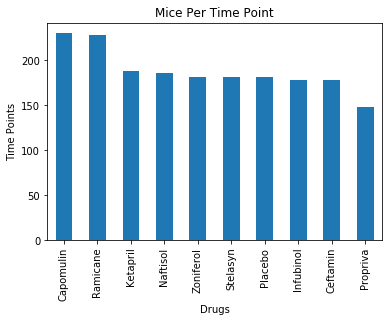

In [16]:
counts = cleandataframe['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.title('Mice Per Time Point')
plt.xlabel('Drugs')
plt.ylabel('Time Points')

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

([<matplotlib.axis.XTick at 0x1a2275f860>],
 <a list of 1 Text xticklabel objects>)

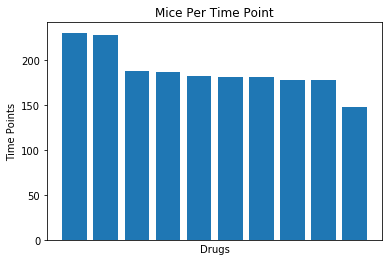

In [18]:
counts = cleandataframe['Drug Regimen'].value_counts()
plt.bar(counts.index.values, counts.values)
plt.title('Mice Per Time Point')
plt.xlabel('Drugs')
plt.ylabel('Time Points')
plt.xticks('rotation=45')

## Pie Plots

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [20]:
# Calculate female vs. male
malevsfemale = cleandataframe["Sex"].value_counts()
malevsfemale

Male      958
Female    922
Name: Sex, dtype: int64

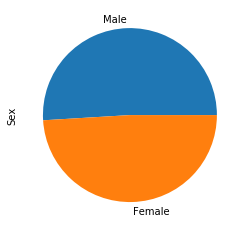

In [21]:
#Generate Pie Plot in PD
malevsfemale.plot(kind='pie')

([<matplotlib.patches.Wedge at 0x1a22e6c3c8>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

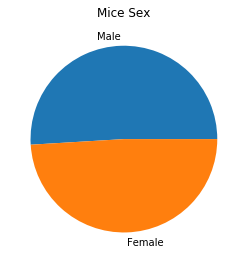

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.pie(malevsfemale.index.values, malevsfemale.values)
plt.title('Mice Sex')
plt.tight_layout()
plt.pie(malevsfemale, labels = ['Male', 'Female'])

## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the most promising drug regimens
# (Capomulin, Ramicane, Infubinol, and Ceftamin.) 
# greatest timepoint by mouse id

#df.groupby(['Mt'], sort=False)['count'].max()
#df.sort_values(by='col1', ascending=False, na_position='first')

timepoint = cleandataframe.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].max().reset_index()#.tail(4)
greatesttimepoint = timepoint.sort_values(by='Tumor Volume (mm3)', ascending=False).head(10)
greatesttimepoint

Drug Regimen  Tumor Volume (mm3)
3     Ketapril           78.567014
4     Naftisol           76.668817
8     Stelasyn           75.123690
9    Zoniferol           73.324432
5      Placebo           73.212939
6     Propriva           72.455421
2    Infubinol           72.226731
1     Ceftamin           68.923185
0    Capomulin           48.158209
7     Ramicane           47.622816

In [100]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [86]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [87]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
